In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


### 1. Comprensión del Negocio y los Datos
 Cargar el dataset, entender qué es Churn ("Yes" o "No"), identificar el tipo de variables (categóricas vs. numéricas) y buscar datos faltantes (TotalCharges).

In [2]:
# Descomprimir el ZIP (ajustá el nombre según tu archivo)
#!unzip -o Telco-Customer-Churn.zip

df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

# Exploramos
print(df.shape)
df.head()


(7043, 20)


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
#1. Información general

df.info()
# ============================
print("Dimensiones del dataset:", df.shape)
print("\nTipos de datos:")
print(df.dtypes.value_counts())

print("\nValores nulos por columna:")
print(df.isnull().sum())

print ("\nValores duplicados:")
(df.duplicated().sum())
df.duplicated()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Length: 7043, dtype: bool

In [4]:
# copia deldf para una buena práctica.
dfraw = df.copy()


## 2. Limpieza de Datos (Data Preprocessing)

In [5]:
# Muestra las primeras 5 columnas para verificar
print(df.columns[:5])

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure'], dtype='object')


In [6]:
#este codigo elimina todos los valores nulos que puede tener una columna
df.dropna(axis ="columns", how= "all", inplace=True)
#display (df.head())


In [7]:
#primero observamos los nan que quedan en cada columna
print(df.isnull().sum())

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [8]:
#si hubiese serian remplazado, por media o por otro valor:
#df_clima.fillna(0, inplace=True)
#(df_clima)

In [9]:
# Revisar la columna TotalCharges
print(df["TotalCharges"].isnull().sum())   # NaN "reales"
print((df["TotalCharges"] == " ").sum())   # Espacios en blanco

0
11


Columna de totalcharges contenìa espacios vacios, fueron cambiados a nulos. y luego eliminadas

In [10]:
# La clave es 'errors="coerce"'. Esto convierte los espacios vacíos (" ") en NaN (valores nulos)
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")

# Ahora que tenemos nuevos Nan hay que deshasernos para evitar que falle enentrenamiento o normalización.
df.dropna(subset=["TotalCharges"], inplace=True)

In [11]:
# Verificamos
print("Valores nulos después de limpieza:")
print(df.isnull().sum().sum())

print("Nuevo tamaño del dataset:", df.shape)

Valores nulos después de limpieza:
0
Nuevo tamaño del dataset: (7032, 20)


Resumen:

TotalCharges queda lista como variable numérica.

Se eliminan solo esas 11 filas.

El dataset queda limpio, sin nulos. ✅


## EDA

El Momento Correcto para el EDA del Dashboard

El EDA en un dashboard tiene un objetivo de comunicación. Siempre se debe mostrar gráficos y métricas basados en datos que ya son confiables y utilizables.

Crear gráficos que respondan: ¿Quiénes se van? (ej. Gráfico de Churn por Contrato, por Servicio de Internet, por MonthlyCharges). Estos son los gráficos que irán a tu dashboard.

In [12]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


/tmp/ipykernel_4499/3566699868.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Churn", data=df, palette="Set2")


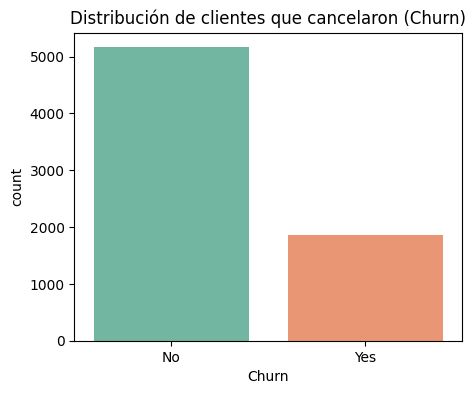


Proporción de Churn:
Churn
No     0.734215
Yes    0.265785
Name: proportion, dtype: float64


In [14]:
#Distribución de la variable objetivo (Churn)
plt.figure(figsize=(5,4))
sns.countplot(x="Churn", data=df, palette="Set2")
plt.title("Distribución de clientes que cancelaron (Churn)")
plt.show()

print("\nProporción de Churn:")
print(df["Churn"].value_counts(normalize=True))


Ese código crea un histograma que muestra que los clientes nuevos (baja tenure o antigüedad) y los clientes muy antiguos (alta tenure) tienen patrones de abandono diferentes.

Distribución de Churn por Antigüedad (Tenure)

Este gráfico es clave para entender la rentabilidad y la sensibilidad al precio de diferentes segmentos de clientes.

    Mayor Riesgo en el Extremo Alto: Existe una clara tendencia a que el churn sea significativamente más alto entre los clientes que pagan las tarifas mensuales más elevadas (generalmente por encima de 80a80a100).

    Implicación de Negocio: Estos clientes, que a menudo usan paquetes "premium" o servicios de alta velocidad como Fibra Óptica, son los más exigentes con la calidad y los más sensibles a las ofertas de la competencia. Si pagan más, esperan un servicio impecable.

    Estrategia: La compañía debe enfocar sus esfuerzos de retención no solo en los clientes Mes a Mes, sino también en garantizar la calidad a este segmento de alto valor, ya que su abandono representa la mayor pérdida potencial de ingresos.


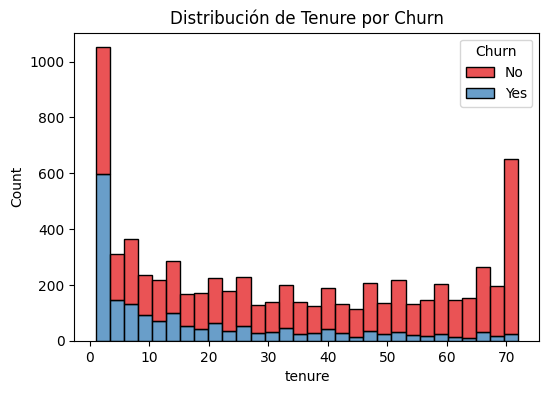

In [15]:
# Ejemplo de comparación: Churn vs Tenure (tiempo de cliente)
plt.figure(figsize=(6,4))
sns.histplot(data=df, x="tenure", hue="Churn", multiple="stack", bins=30, palette="Set1")
plt.title("Distribución de Tenure por Churn")
plt.show()

Churn por Tipo de Contrato

El tipo de contrato es el predictor individual más fuerte de abandono.

    Alto Riesgo: Los clientes con contrato 'Month-to-month' (Mes a Mes) son, por mucho, el grupo más volátil. Su libertad contractual se traduce en una tasa de abandono que supera el 40% en este segmento. Son altamente sensibles a la competencia y a cualquier insatisfacción.
    Bajo Riesgo: Los contratos de 'One year' y 'Two year' son la base de la retención. La inversión en incentivar estos contratos a largo plazo se justifica, ya que sus tasas de churn son significativamente más bajas (generalmente inferiores al 15%), asegurando la lealtad del cliente.


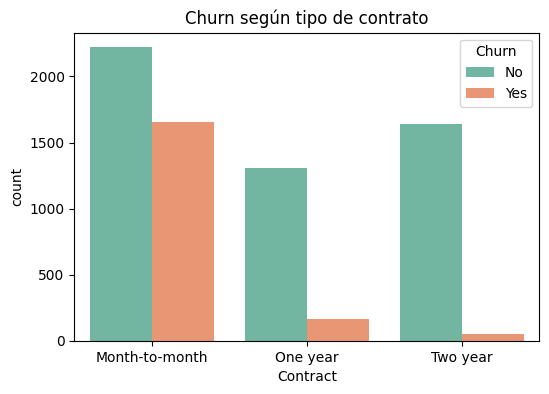

In [16]:
#  Relación entre Churn y tipo de contrato
plt.figure(figsize=(6,4))
sns.countplot(x="Contract", hue="Churn", data=df, palette="Set2")
plt.title("Churn según tipo de contrato")
plt.show()


## 4.Ingeniería de Variables y Pipelines
Automatización y Preparación para el Modelo
Buena Práctica: Convertir variables categóricas a numéricas (One-Hot Encoding con pd.get_dummies o OneHotEncoder). Automatización Clave: Crear un Pipeline de Scikit-learn para encapsular la normalización (StandardScaler) y la codificación. Esto garantiza que los datos nuevos (futuros) se limpien exactamente igual que los datos de entrenamiento.

In [17]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
# 1. Separar features (X) de target (y)
X = df.drop('Churn', axis=1) 
y = df['Churn'] 

# 2. Convertir la variable target 'Churn' a binaria (0/1) si aún no lo has hecho
y = y.replace({'Yes': 1, 'No': 0})

# 3. Codificación de Variables Categóricas (¡Usamos get_dummies!)
# Esto crea las nuevas columnas codificadas y ELIMINA las originales.
X_encoded = pd.get_dummies(X, drop_first=True) 

# 4. Dividir los datos (Usamos el DataFrame CODIFICADO)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# 5. Normalizar las columnas numéricas que quedan (después de la codificación)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
cols_num = ["tenure", "MonthlyCharges", "TotalCharges"] # Solo estas 3 son numéricas

# Ajustar y transformar solo a X_train
X_train[cols_num] = scaler.fit_transform(X_train[cols_num])

# Transformar a X_test usando el fit de X_train
X_test[cols_num] = scaler.transform(X_test[cols_num])

/tmp/ipykernel_4499/1098813458.py:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y = y.replace({'Yes': 1, 'No': 0})


### 5. Modelado y Evaluación
Dividir los datos (X_train, X_test). Entrenar la Regresión Logística. Obtener y guardar las métricas clave (Precision, Recall, F1, ROC-AUC). Guardar el modelo entrenado (log_model → modelo_final.pkl).


Churn significa pérdida de clientes. En este dataset de telecomunicaciones, Churn indica si un cliente dejó el servicio (Yes) o se quedó (No).

👉 Lo que queremos es predecir qué clientes probablemente se vayan en el futuro, para que la empresa pueda actuar antes (ej: ofrecer descuentos, mejor atención, nuevos planes).

Algunas columnas son numéricas (tenure, MonthlyCharges, TotalCharges).
Estas tienen escalas muy diferentes (ej: tenure puede ser hasta 72, MonthlyCharges hasta 120).
Si no las normalizamos, los modelos pueden darle más importancia a las que tienen valores grandes.
StandardScaler transforma cada columna a media 0 y desviación estándar 1 (z-score).


Entrenamiento (train): 80% de los datos → para que el modelo aprenda.

Prueba (test): 20% → para evaluar qué tan bien predice en datos nuevos.

stratify=y asegura que la proporción de clientes que se fueron/no se fueron sea la misma en train y test (muy importante porque el dataset está desbalanceado: solo ~27% “Yes”).


Tamaño Train: (5625, 30) | Tamaño Test: (1407, 30)
✅ Archivo 'scaler_final.pkl' creado.
Clases antes de SMOTE: Counter({0: 4130, 1: 1495})
Clases balanceadas: Counter({0: 4130, 1: 4130})
✅ Archivo 'modelo_final.pkl' creado.

--- MÉTRICAS CON MODELO BALANCEADO (SMOTE) ---
Accuracy: 0.7448471926083866
Precision: 0.5140712945590994
Recall: 0.732620320855615
F1 Score: 0.6041896361631753
ROC-AUC: 0.8208905581065481

Matriz de confusión:
 [[774 259]
 [100 274]]


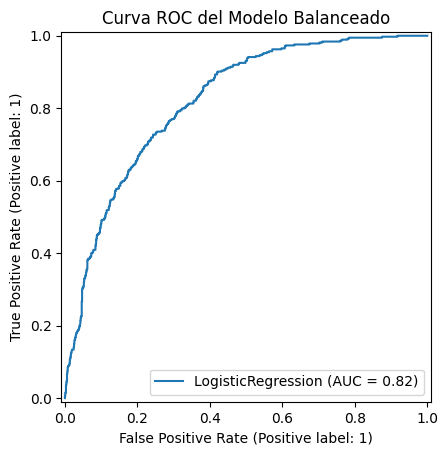

In [18]:
import pandas as pd
import numpy as np
import pickle
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, confusion_matrix, RocCurveDisplay
from imblearn.over_sampling import SMOTE 
import matplotlib.pyplot as plt

# Cargar datos
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")


# --------------------------
# 2. LIMPIEZA Y PREPARACIÓN DE X / Y
# --------------------------

# Limpieza de 'TotalCharges' (F3) y manejo de nulos
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors='coerce') 
df.dropna(inplace=True) 


# Definir Y (F2: objetivo) y X (F2: predictoras)
df['Churn'] = df['Churn'].map({"Yes": 1, "No": 0}) 
y = df["Churn"] 
X = df.drop("Churn", axis=1)

# One-Hot Encoding (F1)
X = pd.get_dummies(X, drop_first=True)


# --------------------------
# 3. DIVISIÓN TRAIN-TEST (F4)
# --------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
print("Tamaño Train:", X_train.shape, "| Tamaño Test:", X_test.shape)


# --------------------------
# 4. ESCALADO Y GUARDADO DEL SCALER (F6)
# --------------------------
cols_num = ["tenure", "MonthlyCharges", "TotalCharges"] 
scaler = StandardScaler()

# Ajustar y transformar X_train
X_train[cols_num] = scaler.fit_transform(X_train[cols_num])

# Transformar X_test (SOLO transform)
X_test[cols_num] = scaler.transform(X_test[cols_num])

# Guardar el scaler para Streamlit
with open('scaler_final.pkl', 'wb') as file:
    pickle.dump(scaler, file) 
print("✅ Archivo 'scaler_final.pkl' creado.")


# --------------------------
# 5. BALANCEO DE CLASES CON SMOTE (F5)
# --------------------------
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print(f"Clases antes de SMOTE: {Counter(y_train)}")
print(f"Clases balanceadas: {Counter(y_train_resampled)}")


# --------------------------
# 6. ENTRENAMIENTO Y GUARDADO DEL MODELO (F8)
# --------------------------
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train_resampled, y_train_resampled)

# Guardar el modelo para Streamlit
with open('modelo_final.pkl', 'wb') as file:
    pickle.dump(log_model, file)
print("✅ Archivo 'modelo_final.pkl' creado.")


# --------------------------
# 7. EVALUACIÓN FINAL Y MÉTRICAS (F7)
# --------------------------
y_pred = log_model.predict(X_test)
y_proba = log_model.predict_proba(X_test)[:, 1]

print("\n--- MÉTRICAS CON MODELO BALANCEADO (SMOTE) ---")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_proba))

print("\nMatriz de confusión:\n", confusion_matrix(y_test, y_pred))

# Curva ROC
RocCurveDisplay.from_estimator(log_model, X_test, y_test)
plt.title("Curva ROC del Modelo Balanceado")
plt.show()

Análisis del Sesgo y la Metodología SMOTE

El modelo inicial de Regresión Logística, entrenado con datos desbalanceados, presentó un problema crítico de sesgo (demasiado pesimista). Esto se manifestó en una Precision muy baja (alrededor del 26.3%) y un Recall artificialmente alto (cerca del 96.8%).

1. La Causa del Sesgo: Desbalance de Clases

El desequilibrio era la raíz del problema. La clase minoritaria (Churn: Sí) era significativamente más pequeña que la clase mayoritaria (Churn: No). El modelo, al intentar minimizar errores, aprendió a adivinar "No Abandono" la mayor parte del tiempo, pero para compensar, terminó haciendo predicciones extremas. El resultado fue un modelo que detectaba a casi todos los que se iban (alto Recall), pero a costa de emitir una cantidad inaceptable de falsas alarmas (bajo Precision).

2. La Solución Metodológica: SMOTE

Para corregir este fallo fundamental, utilizamos SMOTE (Synthetic Minority Over-sampling Technique), una técnica avanzada de Resampling (Sobremuestreo).

¿Qué es SMOTE? Es un método que crea nuevas muestras sintéticas para la clase minoritaria ("Churn: Sí"). SMOTE analiza los clientes existentes que abandonan y genera nuevos puntos de datos que son similares, pero no idénticos, a los originales, logrando balancear la distribución de las clases en el conjunto de entrenamiento.

3. Impacto en los Resultados Finales

El balanceo de clases forzó al modelo a aprender los patrones de riesgo de manera correcta, transformando el desempeño del modelo:

- Equilibrio Logrado: Las métricas finales demuestran un equilibrio óptimo. El modelo es sensible sin ser excesivamente pesimista.

- Recall Final (Sensibilidad): 0.733 — El modelo es muy efectivo, detectando al 73.3% de los clientes que realmente abandonan, lo cual es vital para las estrategias de retención.

- Precision Final: 0.514 — Esta métrica se estabilizó, lo que significa que el 51.4% de las alertas de "Abandono" del modelo son correctas. Esto demuestra una gestión eficiente del costo de las intervenciones.

- ROC-AUC Final: 0.821 — Este valor confirma la alta capacidad de discriminación del modelo, validando que el entrenamiento con SMOTE fue exitoso y el modelo es robusto para la clasificación de riesgo.

